# **Libraries**

In [111]:
# Data Handling and Processing
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Clustering Evaluation Metrics
from sklearn.metrics import davies_bouldin_score,silhouette_score, calinski_harabasz_score
# Clustering Models
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
# Dimensionality Reduction
from sklearn.decomposition import PCA  # Import PCA (Principal Component Analysis) for dimensionality reduction
# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Classification Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Cleaning on training data**

In [112]:
data = pd.read_csv("train.csv")
df = pd.DataFrame(data)
df.shape
# (878049, 9)

(878049, 9)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [114]:
# check for missing data
df.isna().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [115]:
# check for duplicates
df.duplicated().sum()

2323

In [116]:
# remove duplicates
df.drop_duplicates(inplace = True)

In [117]:
# convert the date column form "object" to "datetime"
df['Dates'] = pd.to_datetime(df['Dates'])

In [163]:
# display summary statistics
df.describe()

,Dates,X,Y,Hour,Month,Year,day,n_days,Category_encoded,DayOfWeek_encoded,PdDistrict_encoded
count,815600,815600.000000,815600.000000,815600.000000,815600.000000,815600.000000,815600.000000,815600.000000,815600.000000,815600.000000,815600.000000
mean,2009-03-15 23:48:01.712898816,-122.418225,37.767869,13.416736,6.433984,2008.711246,15.580150,2260.418500,19.266438,2.990278,4.231631
min,2003-01-06 00:01:00,-122.471938,37.707879,0.000000,1.000000,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2006-01-12 14:29:00,-122.427951,37.753924,9.000000,3.000000,2006.000000,8.000000,1102.000000,16.000000,1.000000,2.000000
50%,2009-03-07 18:24:00,-122.415121,37.775421,14.000000,6.000000,2009.000000,16.000000,2252.000000,20.000000,3.000000,4.000000
75%,2012-06-03 09:23:00,-122.406521,37.784816,19.000000,9.000000,2012.000000,23.000000,3436.000000,25.000000,5.000000,7.000000
max,2015-05-13 23:53:00,-122.370355,37.819975,23.000000,12.000000,2015.000000,31.000000,4510.000000,38.000000,6.000000,9.000000
std,NaN,0.018618,0.024083,6.554706,3.428040,3.627997,8.780292,1324.286217,10.683936,2.025398,2.841288


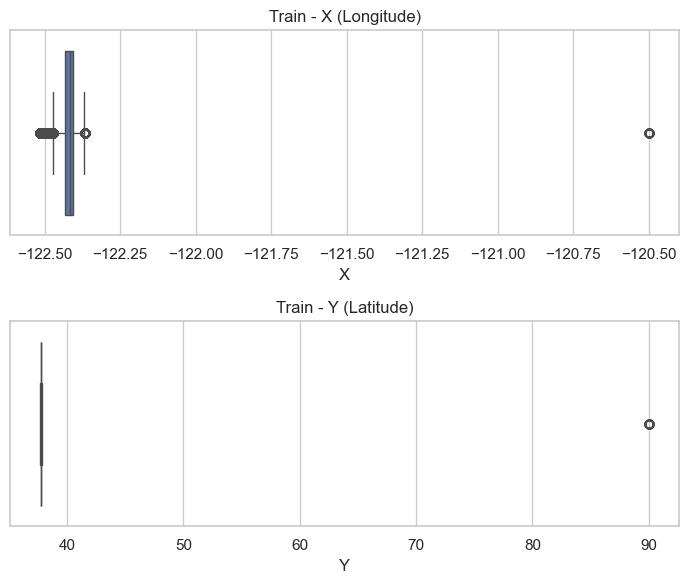

In [119]:
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['X'])
plt.title('Train - X (Longitude)')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['Y'])
plt.title('Train - Y (Latitude)')
plt.tight_layout()

plt.show()

In [120]:
Q1_X = df['X'].quantile(0.25)
Q3_X = df['X'].quantile(0.75)
IQR_X = Q3_X - Q1_X

Q1_Y = df['Y'].quantile(0.25)
Q3_Y = df['Y'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

df = df[(df['X'] >= Q1_X - 1.5 * IQR_X) & (df['X'] <= Q3_X + 1.5 * IQR_X)]

df = df[(df['Y'] >= Q1_Y - 1.5 * IQR_Y) & (df['Y'] <= Q3_Y + 1.5 * IQR_Y)]


In [123]:
# count the number of distinct categories
df['Category'].nunique()

39

In [124]:
# Extract useful time-based features
df['Hour'] = df['Dates'].dt.hour
df['Month'] = df['Dates'].dt.month
df['Year'] = df['Dates'].dt.year
df['day'] = df['Dates'].dt.day
df['n_days'] = (df['Dates'] - df['Dates'].min()).apply(lambda x: x.days)

In [125]:
# Encode categorical columns
le_category = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])

le_day = LabelEncoder()
df['DayOfWeek_encoded'] = le_day.fit_transform(df['DayOfWeek'])

le_district = LabelEncoder()
df['PdDistrict_encoded'] = le_district.fit_transform(df['PdDistrict'])

In [126]:
df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Month,Year,day,n_days,Category_encoded,DayOfWeek_encoded,PdDistrict_encoded
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,4510,37,6,4
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,4510,21,6,4
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13,4510,21,6,4
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13,4510,16,6,4
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13,4510,16,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,0,1,2003,6,0,25,1,8
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,0,1,2003,6,0,16,1,2
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,0,1,2003,6,0,16,1,7
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,0,1,2003,6,0,35,1,7


In [127]:
data = pd.DataFrame()
data[['X', 'Y','day','Month','Hour','n_days','PdDistrict_encoded','Category_encoded']] = df[['X', 'Y','day','Month','Hour','n_days','PdDistrict_encoded','Category_encoded']]
data.head()

,X,Y,day,Month,Hour,n_days,PdDistrict_encoded,Category_encoded
0,-122.425892,37.774599,13,5,23,4510,4,37
1,-122.425892,37.774599,13,5,23,4510,4,21
2,-122.424363,37.800414,13,5,23,4510,4,21
3,-122.426995,37.800873,13,5,23,4510,4,16
4,-122.438738,37.771541,13,5,23,4510,5,16


In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['X', 'Y', 'day', 'Month', 'Hour', 'n_days']

data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Month,Year,day,n_days,Category_encoded,DayOfWeek_encoded,PdDistrict_encoded
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,4510,37,6,4
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,4510,21,6,4
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13,4510,21,6,4
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13,4510,16,6,4
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13,4510,16,6,5


# **Visualization**

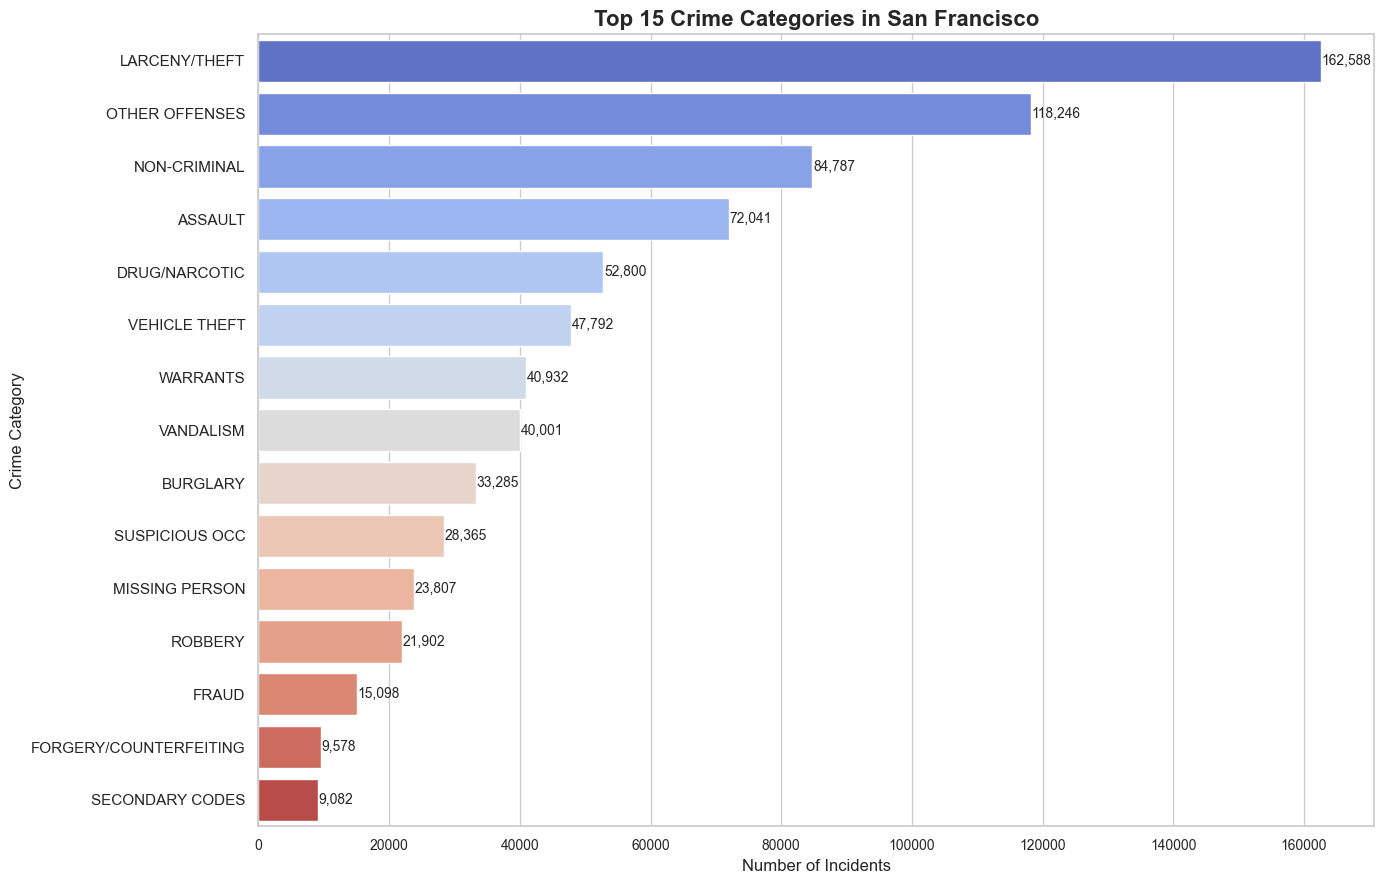

In [130]:
# Crime distribution by category
sns.set_theme(style="whitegrid")
top_crimes = df['Category'].value_counts().head(15)
top_crimes_df = pd.DataFrame({'Category': top_crimes.index, 'Count': top_crimes.values})
plt.figure(figsize=(14, 9))
barplot = sns.barplot(data=top_crimes_df,x='Count',y='Category',hue='Category', palette='coolwarm',dodge=False,legend=False)
plt.title('Top 15 Crime Categories in San Francisco', fontsize=16, weight='bold')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)
for i, value in enumerate(top_crimes_df['Count']):
    plt.text(value + 100, i, f'{value:,}', va='center', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('top_crimes.png')
plt.show()

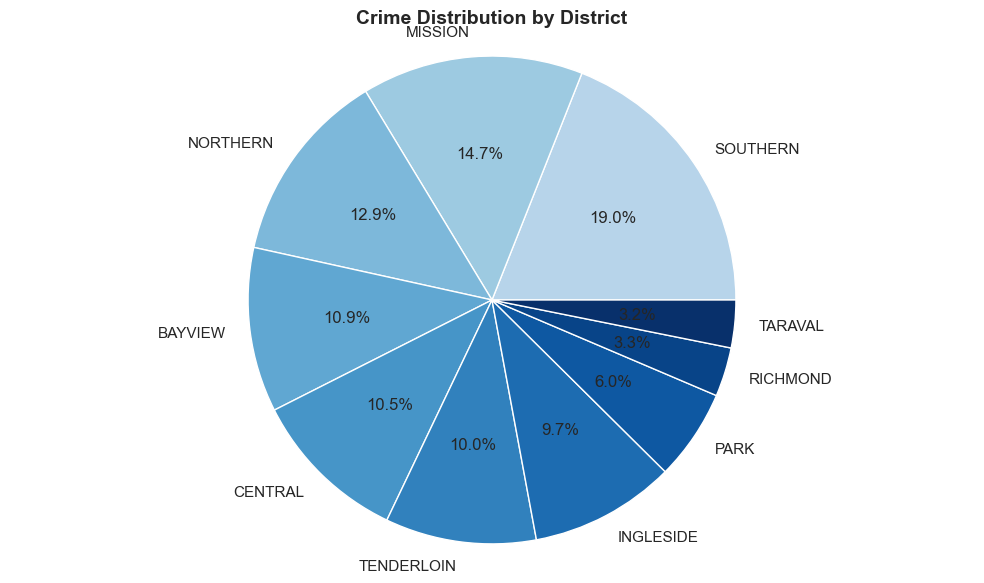

In [131]:
# Crimes by district
plt.figure(figsize=(10, 6))
district_counts = df['PdDistrict'].value_counts()
colors = plt.cm.Blues(np.linspace(0.3, 1, len(district_counts)))
plt.pie(district_counts, labels=district_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Crime Distribution by District', fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('crimes_by_district.png')
plt.show()

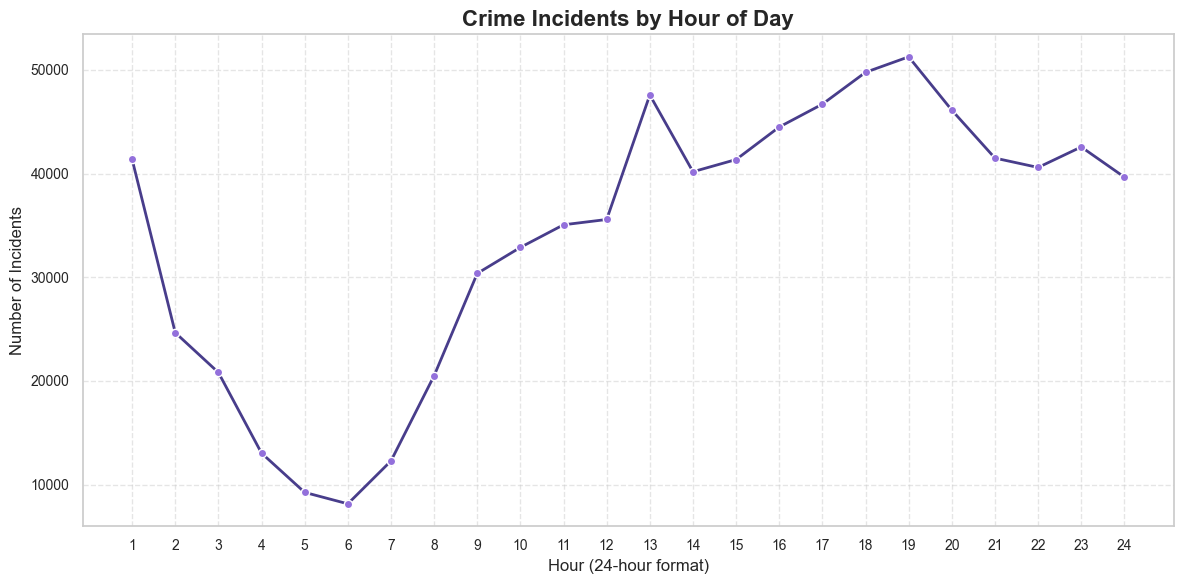

In [132]:
# Crimes by time of day
plt.figure(figsize=(12, 6))
crime_by_hour = df.groupby('Hour')['Category'].count()
plt.plot(crime_by_hour.index + 1, crime_by_hour.values,marker='o',linestyle='-',linewidth=2,color='#483D8B',markerfacecolor='#9370DB',markeredgecolor='white')
plt.title('Crime Incidents by Hour of Day', fontsize=16, weight='bold')
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(range(1, 25), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('crimes_by_hour.png')
plt.show()

# **Clustering Models**

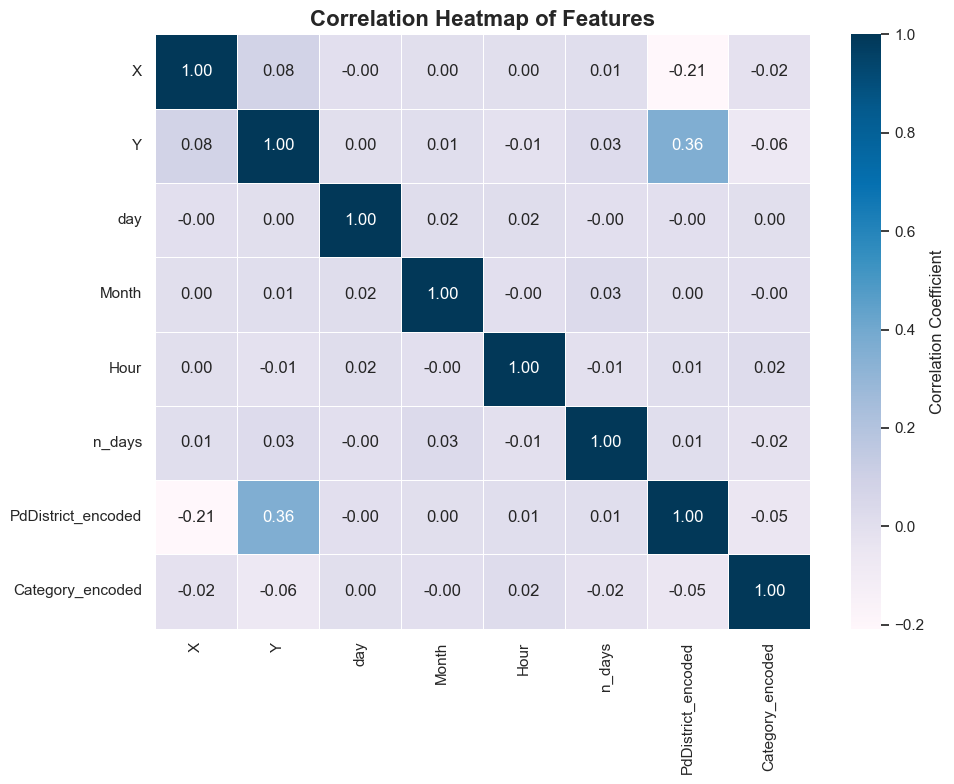

In [164]:
# Correlation Heatmap of Features
corr_matrix =data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='PuBu',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Features', fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig('Correlation Heatmap.png')
plt.show()

In [166]:
# unbiased sample
sampled_data, _ = train_test_split(
    data,
    train_size=25000,
    stratify=data['Category_encoded'],
    random_state=42
)

# select feature columns
X = sampled_data.drop(columns=['Category_encoded'])

In [135]:
X.head()

,X,Y,day,Month,Hour,n_days,PdDistrict_encoded
622312,-0.871797,-0.055218,-0.066074,1.331962,0.241546,-0.918547,5
63599,-0.266478,1.280572,-0.179966,-0.126598,0.394109,1.447257,4
32716,1.905681,-1.337436,0.958949,1.331962,-0.368703,1.570342,0
81367,-1.939273,0.011803,-0.749423,-1.001734,0.546671,1.374010,5
391924,1.152978,0.220264,-0.863315,-0.126598,-2.046887,0.063870,7


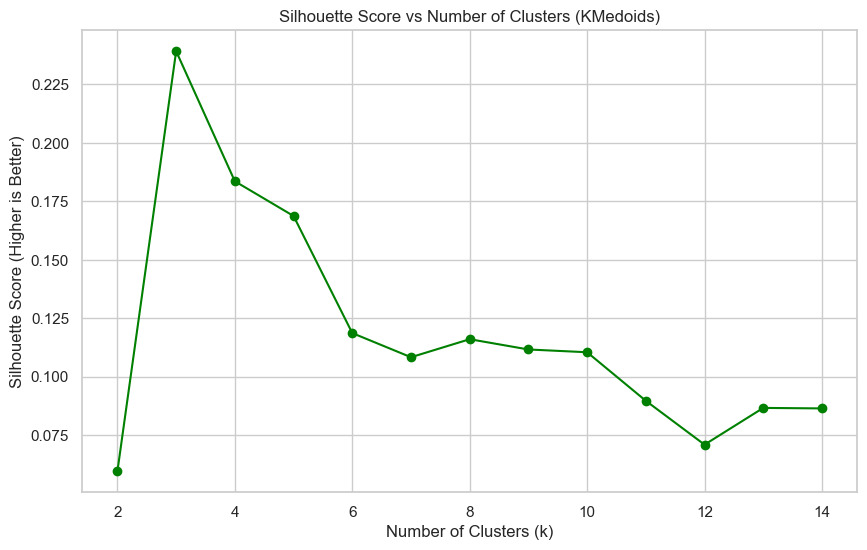

Best k found: 3


In [ ]:
range_n_clusters = range(2, 15)
silhouette_scores = []

for k in range_n_clusters:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(X)

    score = silhouette_score(X, kmedoids.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Number of Clusters (KMedoids)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score (Higher is Better)")
plt.grid(True)
plt.show()
#select best k
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

print(f"Best k found: {best_k}")

In [137]:
# apply kmedoids using the best k value
kmedoids = KMedoids(n_clusters=best_k, random_state=0).fit(X)
# create a new dataframe containing the labels of the cluster
clustered_df = X.copy()
clustered_df['New_Labels'] = kmedoids.labels_

# Evaluation metrics for the train dataset:
features = clustered_df.drop(columns=['New_Labels'])

# 1- silhouette_score better to be big
sil_score_train = silhouette_score(features, kmedoids.labels_)
# 2- calinski_harabasz_score better to be big
calinski_score_train = calinski_harabasz_score(features, kmedoids.labels_)
# 3- davies_bouldin_score better to be small
davies_score_train = davies_bouldin_score(features, kmedoids.labels_)

print("Silhouette Score (Train):", sil_score_train)
print("Calinski-Harabasz Index (Train):", calinski_score_train)
print("Davies-Bouldin Index (Train):", davies_score_train)
print("****************************************")

Silhouette Score (Train): 0.23923224890959147
Calinski-Harabasz Index (Train): 10546.715021629485
Davies-Bouldin Index (Train): 2.272673468023631
****************************************


In [138]:
clustered_df

,X,Y,day,Month,Hour,n_days,PdDistrict_encoded,New_Labels
622312,-0.871797,-0.055218,-0.066074,1.331962,0.241546,-0.918547,5,0
63599,-0.266478,1.280572,-0.179966,-0.126598,0.394109,1.447257,4,0
32716,1.905681,-1.337436,0.958949,1.331962,-0.368703,1.570342,0,0
81367,-1.939273,0.011803,-0.749423,-1.001734,0.546671,1.374010,5,0
391924,1.152978,0.220264,-0.863315,-0.126598,-2.046887,0.063870,7,1
...,...,...,...,...,...,...,...,...
781040,-2.791432,-0.091753,1.414515,-0.126598,-0.978952,-1.576260,8,1
788517,0.895060,0.673499,0.275600,-0.418310,-0.216140,-1.607220,7,2
219333,0.225471,0.165877,-0.749423,-1.001734,1.309482,0.822769,7,2
217473,-0.449263,0.022564,0.731166,-1.001734,-1.894325,0.832586,3,0


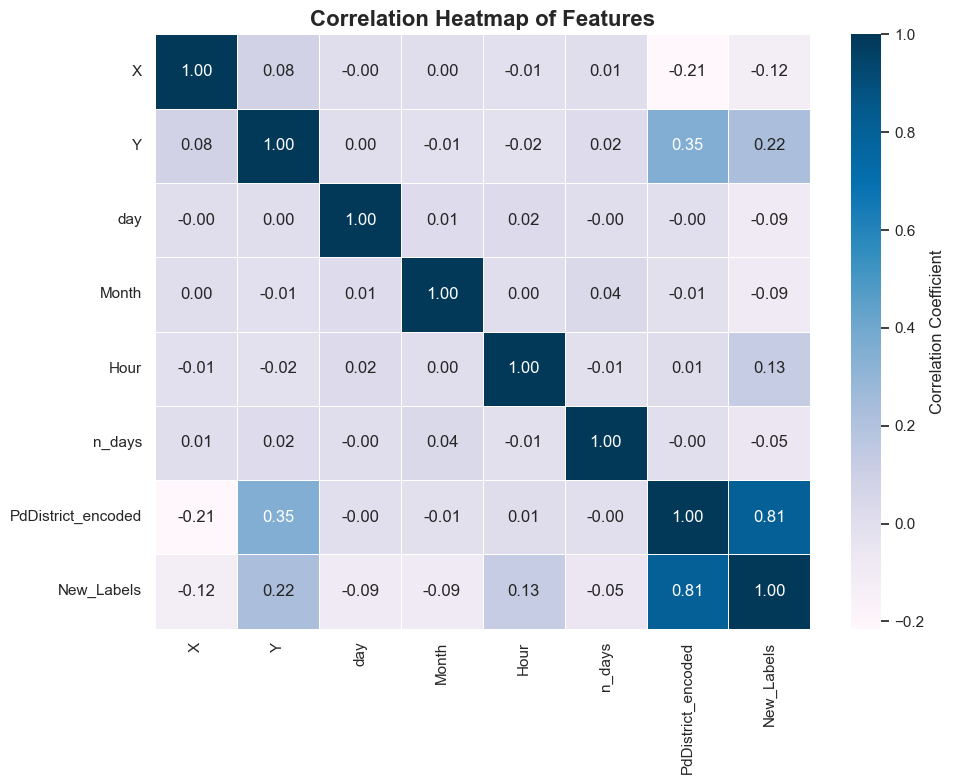

In [139]:
# Correlation Heatmap of Features of the NEW clustered dataset
corr_matrix =clustered_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='PuBu',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Features', fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig('Correlation Heatmap.png')
plt.show()

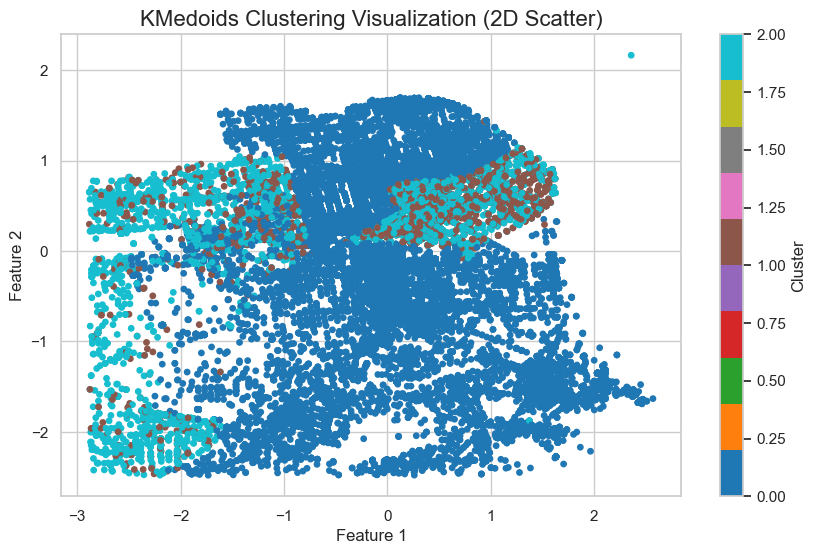

In [167]:
# Create 2D plot using any two columns from X (assuming X is a pandas DataFrame)
plt.figure(figsize=(10, 6))

# Scatter plot with cluster labels as colors
sc = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmedoids.labels_, cmap='tab10', s=15)

plt.title("KMedoids Clustering Visualization (2D Scatter)", fontsize=16)
plt.xlabel("Feature 1")  # Replace with your feature names if needed
plt.ylabel("Feature 2")  # Replace with your feature names if needed

plt.colorbar(sc, label='Cluster')
plt.show()


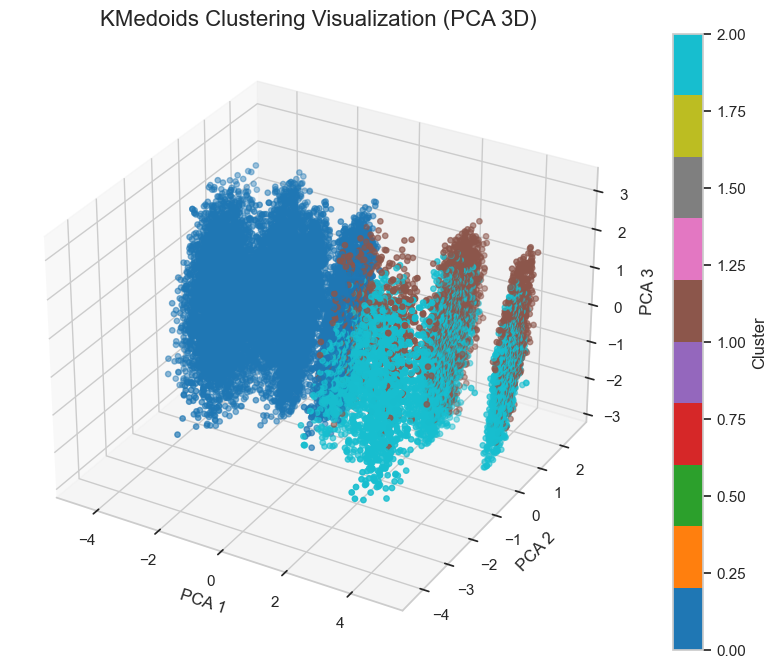

In [140]:
# Apply PCA (Principal Component Analysis) to reduce data to 3D
pca = PCA(n_components=3) # choose 3D
reduced_data_3d = pca.fit_transform(X) # Transform the original data (X) to 3D

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels as colors
sc = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                c=kmedoids.labels_, cmap='tab10', s=15)

ax.set_title("KMedoids Clustering Visualization (PCA 3D)", fontsize=16)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

plt.colorbar(sc, label='Cluster')
plt.show()

* Dendogram

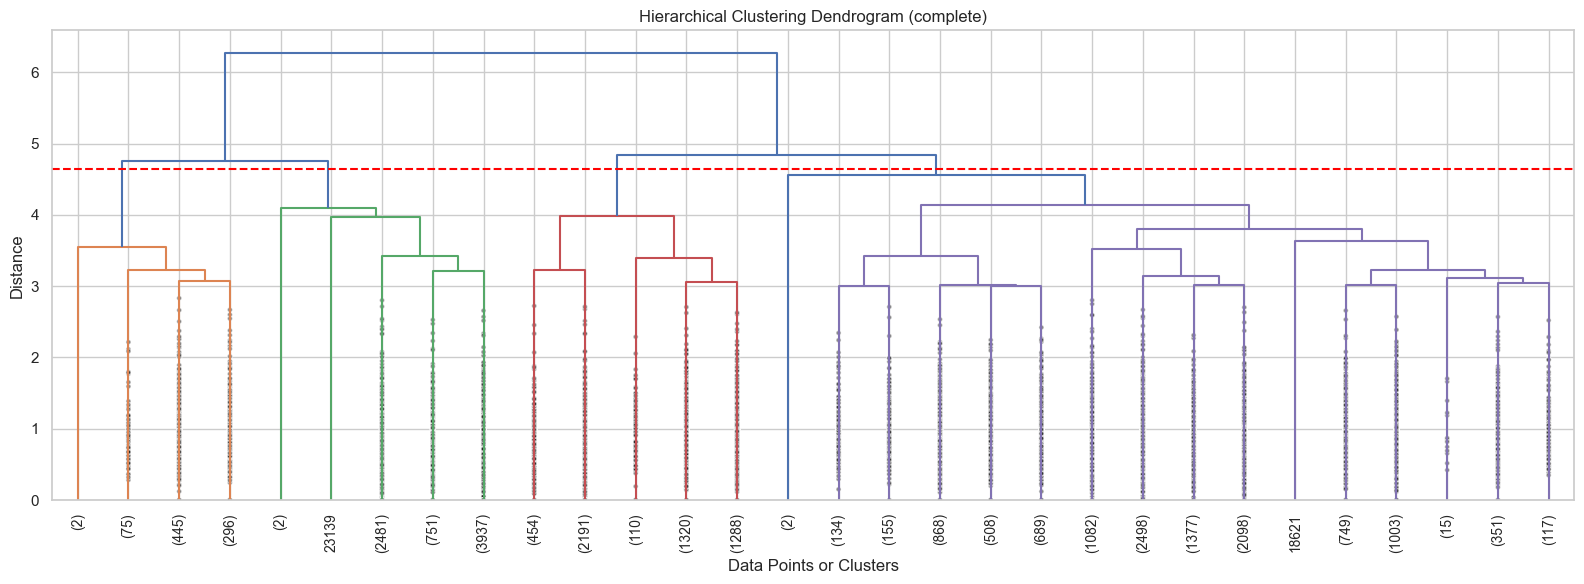

In [ ]:
plt.figure(figsize=(16, 6))
linked=linkage(X,metric='euclidean', method='average')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.axhline(y=4.65, color='red', linestyle='--') 
plt.title("Hierarchical Clustering Dendrogram (complete)")
plt.xlabel("Data Points or Clusters")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig('hierarchical_dendrogram_cut.png')
plt.show()


In [ ]:
hierarchical_model = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='average')
hierarchical_labels = hierarchical_model.fit_predict(X)
hierar_df=X.copy()
hierar_df['Hierarchical_Cluster'] = hierarchical_labels
hierar_df.head()

,X,Y,day,Month,Hour,n_days,PdDistrict_encoded,Hierarchical_Cluster
622312,-0.871797,-0.055218,-0.066074,1.331962,0.241546,-0.918547,5,1
63599,-0.266478,1.280572,-0.179966,-0.126598,0.394109,1.447257,4,1
32716,1.905681,-1.337436,0.958949,1.331962,-0.368703,1.570342,0,0
81367,-1.939273,0.011803,-0.749423,-1.001734,0.546671,1.374010,5,1
391924,1.152978,0.220264,-0.863315,-0.126598,-2.046887,0.063870,7,2


In [169]:
# Evaluation metrics
# get the feature columns without the clutser column
features = hierar_df.drop(columns=['Hierarchical_Cluster'])
# evaluate on the feature columns
sil_score = silhouette_score(features, hierarchical_labels)
calinski_score = calinski_harabasz_score(features, hierarchical_labels)
davies_score = davies_bouldin_score(features, hierarchical_labels)

print("Silhouette Score :", sil_score)
print("Calinski-Harabasz Index :", calinski_score)
print("Davies-Bouldin Index :", davies_score)

Silhouette Score : 0.19457079219017617
Calinski-Harabasz Index : 6334.564726658948
Davies-Bouldin Index : 1.3180004238816496


In [170]:
results = {
    "Metric": ["Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"],
    "KMedoids": [sil_score_train, calinski_score_train, davies_score_train],
    "Hierarchical": [sil_score, calinski_score, davies_score]
}

compare_df = pd.DataFrame(results)
compare_df

,Metric,KMedoids,Hierarchical
0,Silhouette Score,0.239232,0.194571
1,Calinski-Harabasz Index,10546.715022,6334.564727
2,Davies-Bouldin Index,2.272673,1.318000


In [171]:
better_k = int(sil_score_train > sil_score) + int(calinski_score_train > calinski_score) + int(davies_score_train < davies_score)
better_h = 3 - better_k
if better_k > better_h:
    print("KMedoids is the better algorithm based on the metrics.")
elif better_h > better_k:
    print("Hierarchical is the better algorithm based on the metrics.")
else:
    print("Both algorithms performed equally based on the metrics.")

KMedoids is the better algorithm based on the metrics.


# **Classification Models**

In [172]:
# select the feature columns, and the target (new_labels that came from kmedoids)
X_new = clustered_df.drop(columns=['New_Labels'])
y = clustered_df['New_Labels']

In [148]:
from sklearn.model_selection import train_test_split

# Split into Train + Temp (60% train_val, 40% test)
x_train, x_temp, y_train, y_temp = train_test_split(X_new, y, test_size=0.4, random_state=43)

# Split the temp into test and validation (20% test) and  (20% Validation)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=43)

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Train the model on training data
tree_model = DecisionTreeClassifier(max_depth=15, min_samples_split=100, min_samples_leaf=50, criterion='entropy')
tree_model.fit(x_train, y_train)

# 2. Evaluate on Train data
y_pred_tree_train = tree_model.predict(x_train)
print("Decision Tree (Train) Results:")
print("Accuracy of Decision Tree (Train):", accuracy_score(y_train, y_pred_tree_train))
print(classification_report(y_train, y_pred_tree_train, zero_division=0))
print("****************************************")

# 3. Evaluate on Validation data
y_pred_tree_val = tree_model.predict(x_val)
print("Decision Tree (Validation) Results:")
print("Accuracy of Decision Tree (Validation):", accuracy_score(y_val, y_pred_tree_val))
print(classification_report(y_val, y_pred_tree_val, zero_division=0))
print("****************************************")

# 4. Evaluate on Test data
y_pred_tree_test = tree_model.predict(x_test)
print("Decision Tree (Test) Results:")
print("Accuracy of Decision Tree (Test):", accuracy_score(y_test, y_pred_tree_test))
print(classification_report(y_test, y_pred_tree_test, zero_division=0))


Decision Tree (Train) Results:
Accuracy of Decision Tree (Train): 0.9556
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9175
           1       0.87      0.90      0.89      2306
           2       0.93      0.90      0.91      3519

    accuracy                           0.96     15000
   macro avg       0.93      0.93      0.93     15000
weighted avg       0.96      0.96      0.96     15000

****************************************
Decision Tree (Validation) Results:
Accuracy of Decision Tree (Validation): 0.946
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1224
           1       0.88      0.86      0.87       326
           2       0.87      0.91      0.89       450

    accuracy                           0.95      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.95      0.95      0.95      2000

****************************************
D

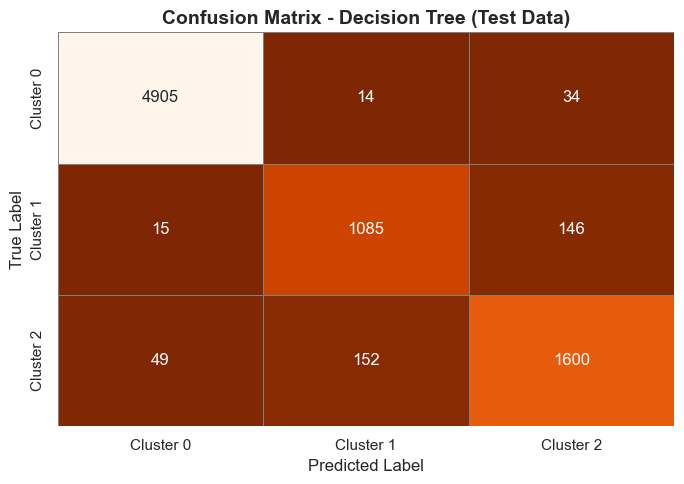

In [150]:
cm_tree_test = confusion_matrix(y_test, y_pred_tree_test)
labels = [f"Cluster {i}" for i in range(cm_tree_test.shape[0])]
y_pred_tree_test = tree_model.predict(x_test)
plt.figure(figsize=(7,5))
sns.heatmap(
    cm_tree_test,
    annot=True,
    fmt="d",
    cmap="Oranges_r",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Confusion Matrix - Decision Tree (Test Data)", fontsize=14, weight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [151]:
# Initialize RandomForestClassifier
rf_best = RandomForestClassifier(
    bootstrap=True,
    max_depth=70,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=400,
    random_state=42
)

# Train the model on train data
rf_best.fit(x_train, y_train)
# Predict on train data
y_pred_rf_train = rf_best.predict(x_train)
print("RandomForest (Train) Results:")
print("Accuracy of RandomForest (Train):", accuracy_score(y_train, y_pred_rf_train))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_rf_train, zero_division=0))
print("****************************************")

# Evaluate on Validation data
y_pred_rf_val = rf_best.predict(x_val)
print("RandomForest (Validation) Results:")
print("Accuracy of RandomForest (Validation):", accuracy_score(y_val, y_pred_rf_val))
print("Classification Report (Validation):\n", classification_report(y_val, y_pred_rf_val, zero_division=0))
print("****************************************")

# Evaluate on Test data
y_pred_rf_test = rf_best.predict(x_test)
print("RandomForest (Test) Results:")
print("Accuracy of RandomForest (Test):", accuracy_score(y_test, y_pred_rf_test))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_rf_test, zero_division=0))


RandomForest (Train) Results:
Accuracy of RandomForest (Train): 0.9966666666666667
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9175
           1       0.99      0.99      0.99      2306
           2       0.99      0.99      0.99      3519

    accuracy                           1.00     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       1.00      1.00      1.00     15000

****************************************
RandomForest (Validation) Results:
Accuracy of RandomForest (Validation): 0.984
Classification Report (Validation):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1224
           1       0.98      0.94      0.96       326
           2       0.95      0.98      0.97       450

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0

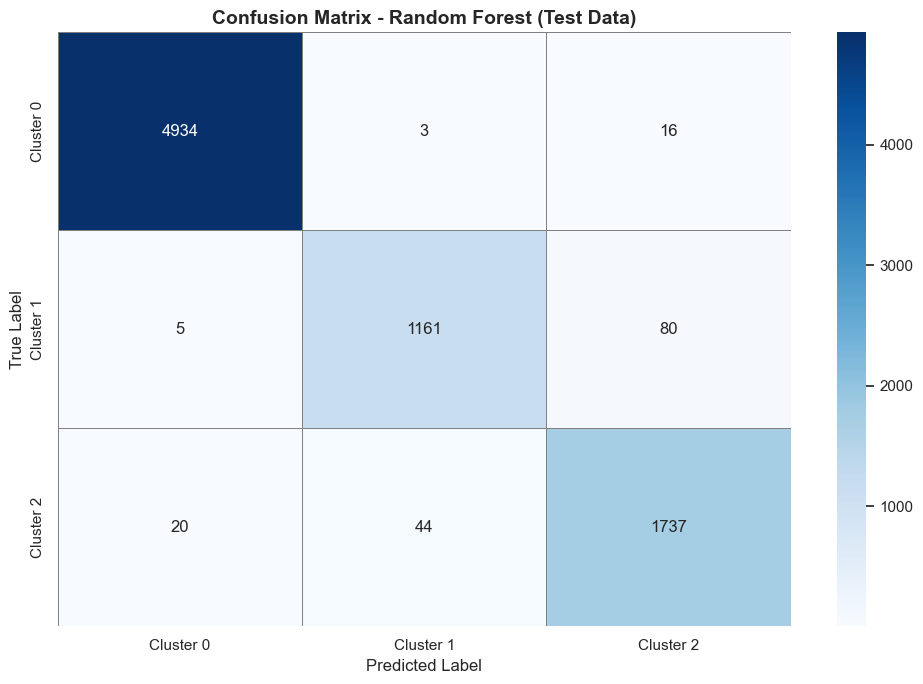

In [152]:
cm = confusion_matrix(y_test, y_pred_rf_test)
labels = [f"Cluster {i}" for i in range(cm.shape[0])]
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Confusion Matrix - Random Forest (Test Data)", fontsize=14, weight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()